## Project-PF: Patient Flow Prediction in Ethiopia
Coded by Geletaw Sahle Tegenaw

### Patient Flow 
#### Defined 
The movement of patients through a healthcare facility from the point of admission to the point of discharge. 
A quality improvement tool which can be used to help identify patient flow inefficiencies at any type of health care facility and inform areas for intervention to help improve care delivery processes.


### Scope 
Outpatient vs Inpatient 

#### Outpatient  Patient Flow
An individual (patient) who receives healthcare services on an outpatient basis, meaning they do not stay overnight in a hospital or inpatient facility.

#### Inpatient Patient Flow
Refers to someone admitted to the hospital to stay overnight, whether briefly or for an extended period of time.


##### Why patient flow is important? 
1. Reduce the need for regular surge plans.
2. Prevent diversions and overcrowding in ED.
3. Eliminate high wait times and delays for treatments, and admissions to inpatient beds.
4. Improve staff schedules to match demand, while reducing excessive overtime.
5. Increase the number of patients admitted to the appropriate inpatient unit based on a patient’s clinical condition.
6. Utilize case management strategies to reduce the length of stay for outliers.
7. Improve discharge and bed capacity management planning.


##### Challenges 
1. Inefficiencies in the patient visit and efficiently collect patient flow data.
2. A mismatch between staffing ratios and service demand leads to overcrowding of patients in waiting rooms of health centers. 

#### Proposed Solution 
1. Designing real-time patient flow data-driven dashboard in Ethiopia
2. Perform analysis analysis and prediction e.g. Time Series 
3. Patient load prediction model for forecasting future patient loads 
4. Re-assigning surplus patient loads to adjacent facilities with low load as a means of controlling congestion and reducing the number of patients who leave health facilities without obtaining medical care as a result of overcrowding
5. Automatic matching of patient flow with diseases based on disease registration 

### Scope 

### Case Study between South-Western Ethiopia Specialized hospital, General Hospitals, Primary Hospitals and Health Centers. The detail is listed as follows 

1. Jimma University Medical Center (Specilized Hospital), 

2. Three General Hospitals: Gambella General Hospital (GH), Agaro General Hospital(GH), 

3. Five Primary Hospitals: Nyinenyang Primary Hospital, Kumi Primary Hospital, Seka Chekorsa Primary Hospital,OmoNada Primary Hospital, Setema Primary Hospital,

4. 12 health centers

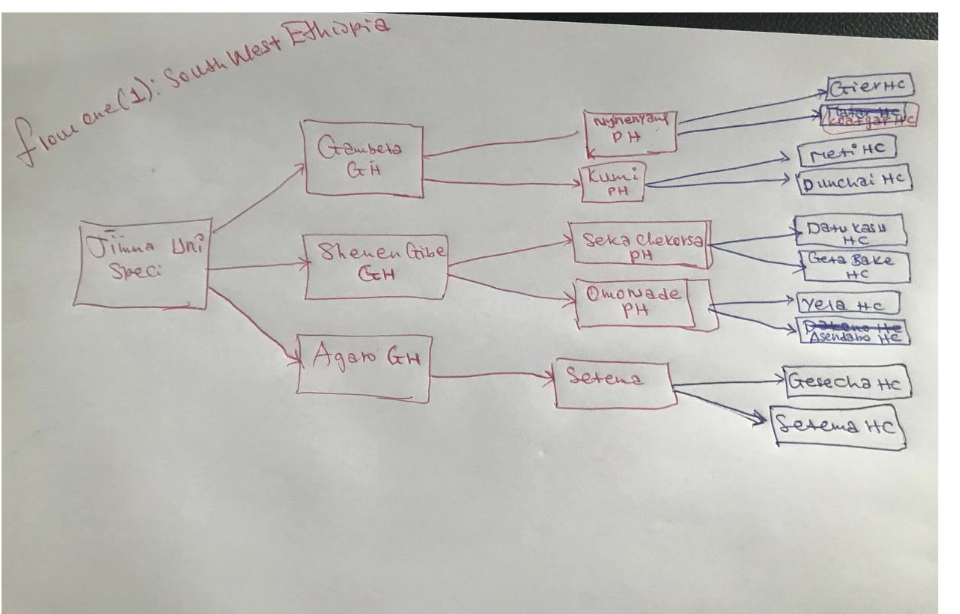

In [258]:
from IPython.display import Image
Image("PF.png")

### Importing libraries  

In [80]:
import pandas as pd 
from functools import partial, reduce

### Importing the required datasets

In [264]:
# Specialized hospital 
dataJUSH  = pd.read_csv("Jimma_University_Specialized_Hospital_Clinic_Monthly_Service_Delivery.csv")
SH_JU  = pd.read_csv("PF_dataset/SH_JU.csv")

# General  hospital 
GH_Gambella  = pd.read_csv("PF_dataset/GH_Gambella.csv")
GH_ShenanGibe  = pd.read_csv("PF_dataset/GH_ShenanGibe.csv")
GH_Agaro  = pd.read_csv("PF_dataset/GH_Agaro.csv")


# primary hospital 
PH_Setema = pd.read_csv("PF_dataset/PH_Setema.csv")
PH_SekaChekorsa = pd.read_csv("PF_dataset/PH_SekaChekorsa.csv")
PH_OmoNada = pd.read_csv("PF_dataset/PH_OmoNada .csv")
PH_Nyinenyang = pd.read_csv("PF_dataset/PH_Nyinenyang.csv")
PH_kumi= pd.read_csv("PF_dataset/PH_Kumi.csv")

# health center 
HC_Asendabo = pd.read_csv("PF_dataset/HC_Asendabo.csv")
HC_DatoKarsu = pd.read_csv("PF_dataset/HC_DatoKarsu.csv")
HC_Dunchai = pd.read_csv("PF_dataset/HC_Dunchai.csv")
HC_Gesecha = pd.read_csv("PF_dataset/HC_Gesecha.csv")
HC_GetaBake = pd.read_csv("PF_dataset/HC_GetaBake.csv")
HC_Gier = pd.read_csv("PF_dataset/HC_Gier.csv")
HC_Jimma = pd.read_csv("PF_dataset/HC_Jimma.csv")
HC_JimmaHigherTwo = pd.read_csv("PF_dataset/HC_JimmaHigherTwo.csv")
HC_Koatgar = pd.read_csv("PF_dataset/HC_Koatgar.csv")
HC_Meti = pd.read_csv("PF_dataset/HC_Meti.csv")
HC_SentemaKecha = pd.read_csv("PF_dataset/HC_SentemaKecha.csv")
HC_YelaSesacha = pd.read_csv("PF_dataset/HC_YelaSesacha.csv")

### A function to pre-process columns and searching strings

In [265]:
def process_Column_List(df, *args):
    column_list = df.columns.tolist()
    id_vars_list = column_list[:len(column_list)-1] + column_list[-1:]
    return id_vars_list

def search_String(df, lookingfor,  *args):
    # Search columns for the entire string
    return df[[col for col in df.columns if lookingfor in col]]

def pre_process(df):
    df['variable'].str.split(' ', expand=True)
    # Spliting the varaible pandas column into year and months
    df[['Month', 'Year']] = df['variable'].str.split(' ',expand=True)
    
    # rename the column value
    df.rename({'value': 'Value'}, axis=1, inplace=True)
    
    # drop the column varaible     
    finalDf = df.drop(['S.No', 'variable'], axis=1)
    
    # fill missing values, if there is any 
    finalDf = finalDf.fillna("0")
    
    return finalDf

### Specialized Hospital Data Pre-processing

In [24]:
SH_JU.head(1)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_in_from_III,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,...,Genbot 2013,Sene 2013,Hamle 2013,Nehase 2013,Meskerem 2014,Tikemet 2014,Hidar 2014,Tahesas 2014,Tir 2014,Total
0,SH,JUSH,GH,Gambella GH,Shenan Gibe GH,Agaro GH,SH,Blacklion SH,RMH_FP_CAR,Contraceptive acceptance rate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
SH_JU.shape

(1249, 52)

In [26]:
SH_JU.columns

Index(['Category ', 'Name', 'Referral_in_Facility_Type', 'Referral_in_from_I',
       'Referral_in_from_II', 'Referral_in_from_III',
       'Referral_out_Facility_Type', 'Referral_out_to', 'S.No', 'Activity',
       'Meskerem 2011', 'Tikemet 2011', 'Hidar 2011', 'Tahesas 2011',
       'Tir 2011', 'Yekatit 2011', 'Megabit 2011', 'Miazia 2011',
       'Genbot 2011', 'Sene 2011', 'Hamle 2011', 'Nehase 2011',
       'Meskerem 2012', 'Tikemet 2012', 'Hidar 2012', 'Tahesas 2012',
       'Tir 2012', 'Yekatit 2012', 'Megabit 2012', 'Miazia 2012',
       'Genbot 2012', 'Sene 2012', 'Hamle 2012', 'Nehase 2012',
       'Meskerem 2013', 'Tikemet 2013', 'Hidar 2013', 'Tahesas 2013',
       'Tir 2013', 'Yekatit 2013', 'Megabit 2013', 'Miazia 2013',
       'Genbot 2013', 'Sene 2013', 'Hamle 2013', 'Nehase 2013',
       'Meskerem 2014', 'Tikemet 2014', 'Hidar 2014', 'Tahesas 2014',
       'Tir 2014', 'Total'],
      dtype='object')

In [27]:
id_vars_list = process_Column_List(SH_JU)
len(id_vars_list)

52

In [28]:
# id_vars : columns remains 
# value_vars = columns to be merged 
SH_JU_processedDF = pd.melt(SH_JU, id_vars=
                      ['Category ', 'Name', 'Referral_in_Facility_Type', 'Referral_in_from_I',
                       'Referral_in_from_II', 'Referral_in_from_III','Referral_out_Facility_Type', 
                       'Referral_out_to','S.No','Activity'], 
        value_vars=[
             'Tikemet 2011',
             'Hidar 2011',
             'Tahesas 2011',
             'Tir 2011',
             'Yekatit 2011',
             'Megabit 2011',
             'Miazia 2011',
             'Genbot 2011',
             'Sene 2011',
             'Hamle 2011',
             'Nehase 2011',
             'Meskerem 2012',
             'Tikemet 2012',
             'Hidar 2012',
             'Tahesas 2012',
             'Tir 2012',
             'Yekatit 2012',
             'Megabit 2012',
             'Miazia 2012',
             'Genbot 2012',
             'Sene 2012',
             'Hamle 2012',
             'Nehase 2012',
             'Meskerem 2013',
             'Tikemet 2013',
             'Hidar 2013',
             'Tahesas 2013',
             'Tir 2013',
             'Yekatit 2013',
             'Megabit 2013',
             'Miazia 2013',
             'Genbot 2013',
             'Sene 2013',
             'Hamle 2013',
             'Nehase 2013',
             'Meskerem 2014',
             'Tikemet 2014',
             'Hidar 2014',
             'Tahesas 2014',
             'Tir 2014',])#.drop('variable',axis=1)

In [29]:
SH_JU_processedDF.head()

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_in_from_III,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,SH,JUSH,GH,Gambella GH,Shenan Gibe GH,Agaro GH,SH,Blacklion SH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,SH,JUSH,GH,Gambella GH,Shenan Gibe GH,Agaro GH,SH,Blacklion SH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN
2,SH,JUSH,GH,Gambella GH,Shenan Gibe GH,Agaro GH,SH,Blacklion SH,FP_CAR_Age,"Total new and repeat acceptors, disaggregated ...",Tikemet 2011,94.0
3,SH,JUSH,GH,Gambella GH,Shenan Gibe GH,Agaro GH,SH,Blacklion SH,FP_CAR_Age_New,Contraceptive new acceptors by age,Tikemet 2011,1.0
4,SH,JUSH,GH,Gambella GH,Shenan Gibe GH,Agaro GH,SH,Blacklion SH,FP_CAR_Age_New. 1,10 - 14 years,Tikemet 2011,NaN


In [30]:
# pre-process  speicilized hospital dataset
JUSH_processedDF = pre_process(SH_JU_processedDF)
JUSH_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_in_from_III,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,SH,JUSH,GH,Gambella GH,Shenan Gibe GH,Agaro GH,SH,Blacklion SH,Contraceptive acceptance rate,0,Tikemet,2011
1,SH,JUSH,GH,Gambella GH,Shenan Gibe GH,Agaro GH,SH,Blacklion SH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [83]:
JUSH_processedDF.shape

(49960, 12)

In [183]:
JUSH_processed = JUSH_processedDF.to_csv("PF_dataset/SH_processed.csv")

### General Hospital Data Pre-processing

In [266]:
def gh_process_columns(df):
    # id_vars : columns remains 
    # value_vars = columns to be merged 
    processedDF = pd.melt(df, id_vars=
                      ['Category ', 'Name', 'Referral_in_Facility_Type', 'Referral_in_from_I',
                       'Referral_in_from_II','Referral_out_Facility_Type', 
                       'Referral_out_to','S.No','Activity'], 
        value_vars=[
             'Tikemet 2011',
             'Hidar 2011',
             'Tahesas 2011',
             'Tir 2011',
             'Yekatit 2011',
             'Megabit 2011',
             'Miazia 2011',
             'Genbot 2011',
             'Sene 2011',
             'Hamle 2011',
             'Nehase 2011',
             'Meskerem 2012',
             'Tikemet 2012',
             'Hidar 2012',
             'Tahesas 2012',
             'Tir 2012',
             'Yekatit 2012',
             'Megabit 2012',
             'Miazia 2012',
             'Genbot 2012',
             'Sene 2012',
             'Hamle 2012',
             'Nehase 2012',
             'Meskerem 2013',
             'Tikemet 2013',
             'Hidar 2013',
             'Tahesas 2013',
             'Tir 2013',
             'Yekatit 2013',
             'Megabit 2013',
             'Miazia 2013',
             'Genbot 2013',
             'Sene 2013',
             'Hamle 2013',
             'Nehase 2013',
             'Meskerem 2014',
             'Tikemet 2014',
             'Hidar 2014',
             'Tahesas 2014',
             'Tir 2014',])#.drop('variable',axis=1)
    return processedDF

##### Gambella GH

In [267]:
id_vars_list = process_Column_List(GH_Gambella)
len(id_vars_list)
id_vars_list = process_Column_List(GH_Gambella)
GH_Gambella_processedDF = gh_process_columns(GH_Gambella) 
GH_Gambella_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,GH,Gambella GH,PH,Kumi PH,Nyinenyang PH,SH,JUSH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,GH,Gambella GH,PH,Kumi PH,Nyinenyang PH,SH,JUSH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [268]:
# pre-process  GH dataset
GH_Gambella_processedDF = pre_process(GH_Gambella_processedDF)
GH_Gambella_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,GH,Gambella GH,PH,Kumi PH,Nyinenyang PH,SH,JUSH,Contraceptive acceptance rate,0,Tikemet,2011
1,GH,Gambella GH,PH,Kumi PH,Nyinenyang PH,SH,JUSH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [269]:
GH_Gambella_processedDF.shape

(49960, 11)

##### Shenan Gibe

In [270]:
id_vars_list = process_Column_List(GH_ShenanGibe)
GH_ShenanGibe_processedDF = gh_process_columns(GH_ShenanGibe)
GH_ShenanGibe_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,GH,Shenan Gibe GH,PH,Seek Chekorsa PH,Omo Nada PH,SH,JUSH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,GH,Shenan Gibe GH,PH,Seek Chekorsa PH,Omo Nada PH,SH,JUSH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [271]:
# pre-process  GH dataset
GH_ShenanGibe_processedDF = pre_process(GH_ShenanGibe_processedDF)
GH_ShenanGibe_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,GH,Shenan Gibe GH,PH,Seek Chekorsa PH,Omo Nada PH,SH,JUSH,Contraceptive acceptance rate,0,Tikemet,2011
1,GH,Shenan Gibe GH,PH,Seek Chekorsa PH,Omo Nada PH,SH,JUSH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [272]:
GH_ShenanGibe_processedDF.shape

(49960, 11)

##### Agaro GH

In [273]:
id_vars_list = process_Column_List(GH_Agaro)
GH_Agaro_processedDF = gh_process_columns(GH_Agaro)
GH_Agaro_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,GH,Agaro GH,PH,Setema PH,NaN,SH,JUSH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,GH,Agaro GH,PH,Setema PH,NaN,SH,JUSH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [274]:
# pre-process  GH dataset
GH_Agaro_processedDF = pre_process(GH_Agaro_processedDF)
GH_Agaro_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,GH,Agaro GH,PH,Setema PH,0,SH,JUSH,Contraceptive acceptance rate,0,Tikemet,2011
1,GH,Agaro GH,PH,Setema PH,0,SH,JUSH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [275]:
GH_Agaro_processedDF.shape

(49960, 11)

###### Merge General Hospital dataset together 

In [276]:
ghdf = [GH_Agaro_processedDF, GH_ShenanGibe_processedDF, GH_Gambella_processedDF]

In [277]:
merged_GH_df = pd.concat(ghdf, axis=0)
merged_GH_df.head(1)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,GH,Agaro GH,PH,Setema PH,0,SH,JUSH,Contraceptive acceptance rate,0,Tikemet,2011


In [278]:
merged_GH_df.shape

(149880, 11)

merge = partial(pd.merge, how='outer')
merged_GH_df = reduce(merge, ghdf)
merged_GH_df.shape

In [279]:
merged_GH = merged_GH_df.to_csv("PF_dataset/merged_GH.csv")

### Primary Hospital Data Pre-processing

In [280]:
def ph_column_processing(df):
    # id_vars : columns remains 
    # value_vars = columns to be merged 
    processedDF = pd.melt(df, id_vars=
                      ['Category ', 'Name', 'Referral_in_Facility_Type', 'Referral_in_from_I',
                       'Referral_in_from_II', 'Referral_out_Facility_Type', 'Referral_out_to','S.No','Activity'], 
        value_vars=[
             'Tikemet 2011',
             'Hidar 2011',
             'Tahesas 2011',
             'Tir 2011',
             'Yekatit 2011',
             'Megabit 2011',
             'Miazia 2011',
             'Genbot 2011',
             'Sene 2011',
             'Hamle 2011',
             'Nehase 2011',
             'Meskerem 2012',
             'Tikemet 2012',
             'Hidar 2012',
             'Tahesas 2012',
             'Tir 2012',
             'Yekatit 2012',
             'Megabit 2012',
             'Miazia 2012',
             'Genbot 2012',
             'Sene 2012',
             'Hamle 2012',
             'Nehase 2012',
             'Meskerem 2013',
             'Tikemet 2013',
             'Hidar 2013',
             'Tahesas 2013',
             'Tir 2013',
             'Yekatit 2013',
             'Megabit 2013',
             'Miazia 2013',
             'Genbot 2013',
             'Sene 2013',
             'Hamle 2013',
             'Nehase 2013',
             'Meskerem 2014',
             'Tikemet 2014',
             'Hidar 2014',
             'Tahesas 2014',
             'Tir 2014',])#.drop('variable',axis=1)
    return processedDF

##### PH_Setema 

In [281]:
id_vars_list = process_Column_List(PH_Setema)
PH_Setema_processedDF = ph_column_processing(PH_Setema)
PH_Setema_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,PH,Setema PH,HC,Gesecha HC,Sentema Kecha HC,GH,Agaro GH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,PH,Setema PH,HC,Gesecha HC,Sentema Kecha HC,GH,Agaro GH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [282]:
# pre-process  HC dataset
# convert months and years column name into column values
PH_Setema_processedDF = pre_process(PH_Setema_processedDF)
PH_Setema_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,PH,Setema PH,HC,Gesecha HC,Sentema Kecha HC,GH,Agaro GH,Contraceptive acceptance rate,0,Tikemet,2011
1,PH,Setema PH,HC,Gesecha HC,Sentema Kecha HC,GH,Agaro GH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [283]:
PH_Setema_processedDF.shape

(49960, 11)

##### PH_SekaChekorsa

In [284]:
id_vars_list = process_Column_List(PH_SekaChekorsa)
PH_SekaChekorsa_processedDF = ph_column_processing(PH_SekaChekorsa)
PH_SekaChekorsa_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,PH,Seka Chekorsa PH,HC,Geta Bake HC,DatoKarsu HC,GH,Shenan Gibe GH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,PH,Seka Chekorsa PH,HC,Geta Bake HC,DatoKarsu HC,GH,Shenan Gibe GH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [285]:
# pre-process  HC dataset
# convert months and years column name into column values
PH_SekaChekorsa_processedDF = pre_process(PH_SekaChekorsa_processedDF)
PH_SekaChekorsa_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,PH,Seka Chekorsa PH,HC,Geta Bake HC,DatoKarsu HC,GH,Shenan Gibe GH,Contraceptive acceptance rate,0,Tikemet,2011
1,PH,Seka Chekorsa PH,HC,Geta Bake HC,DatoKarsu HC,GH,Shenan Gibe GH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [286]:
PH_SekaChekorsa_processedDF.shape

(49960, 11)

##### PH_OmoNada

In [287]:
id_vars_list = process_Column_List(PH_OmoNada)
PH_OmoNada_processedDF = ph_column_processing(PH_OmoNada)
PH_OmoNada_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,PH,Omo Nada PH,HC,Yela Sesacha HC,Asendabo HC,GH,Shenan Gibe GH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,PH,Omo Nada PH,HC,Yela Sesacha HC,Asendabo HC,GH,Shenan Gibe GH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [288]:
# pre-process  HC dataset
# convert months and years column name into column values
PH_OmoNada_processedDF = pre_process(PH_OmoNada_processedDF)
PH_OmoNada_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,PH,Omo Nada PH,HC,Yela Sesacha HC,Asendabo HC,GH,Shenan Gibe GH,Contraceptive acceptance rate,0,Tikemet,2011
1,PH,Omo Nada PH,HC,Yela Sesacha HC,Asendabo HC,GH,Shenan Gibe GH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [289]:
PH_OmoNada_processedDF.shape

(49960, 11)

##### PH_Nyinenyang 

In [290]:
id_vars_list = process_Column_List(PH_Nyinenyang)
PH_Nyinenyang_processedDF = ph_column_processing(PH_Nyinenyang)
PH_Nyinenyang_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,PH,Nyinenyang PH,HC,Gier HC,Koatgar HC,GH,Gambella GH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,PH,Nyinenyang PH,HC,Gier HC,Koatgar HC,GH,Gambella GH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [291]:
# pre-process  HC dataset
# convert months and years column name into column values
PH_Nyinenyang_processedDF = pre_process(PH_Nyinenyang_processedDF)
PH_Nyinenyang_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,PH,Nyinenyang PH,HC,Gier HC,Koatgar HC,GH,Gambella GH,Contraceptive acceptance rate,0,Tikemet,2011
1,PH,Nyinenyang PH,HC,Gier HC,Koatgar HC,GH,Gambella GH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [292]:
PH_Nyinenyang_processedDF.shape

(49960, 11)

##### PH_kumi

In [293]:
id_vars_list = process_Column_List(PH_kumi)
PH_kumi_processedDF = ph_column_processing(PH_kumi)
PH_kumi_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,PH,Kumi PH,HC,Meti HC,Dunchai HC,GH,Gambella GH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,PH,Kumi PH,HC,Meti HC,Dunchai HC,GH,Gambella GH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [294]:
# pre-process  HC dataset
# convert months and years column name into column values
PH_kumi_processedDF = pre_process(PH_kumi_processedDF)
PH_kumi_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,PH,Kumi PH,HC,Meti HC,Dunchai HC,GH,Gambella GH,Contraceptive acceptance rate,0,Tikemet,2011
1,PH,Kumi PH,HC,Meti HC,Dunchai HC,GH,Gambella GH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [295]:
PH_kumi_processedDF.shape

(49960, 11)

##### Merge Primary Hospital dataset together

In [299]:
# primary hospital processed dataframes
phdf = [PH_Setema_processedDF, PH_SekaChekorsa_processedDF, 
        PH_OmoNada_processedDF, PH_Nyinenyang_processedDF, PH_kumi_processedDF]

In [300]:
merged_ph_df = pd.concat(phdf, axis=0)
merged_ph_df.head(1)

,Category,Name,Referral_in_Facility_Type,Referral_in_from_I,Referral_in_from_II,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,PH,Setema PH,HC,Gesecha HC,Sentema Kecha HC,GH,Agaro GH,Contraceptive acceptance rate,0,Tikemet,2011


merge = partial(pd.merge, how='outer')
merged_ph_df = reduce(merge, phdf)
merged_ph_df.shape

In [301]:
merged_PH = merged_ph_df.to_csv("PF_dataset/merged_PH_processed.csv")

###  Health Center Data Pre-processing

In [302]:
def hc_column_procesing(df):
    # id_vars : columns remains 
    # value_vars = columns to be merged 
    processedDF = pd.melt(df, id_vars=
                      ['Category ', 'Name', 'Referral_in_Facility_Type', 'Referral_in_from',
                       'Referral_out_Facility_Type', 'Referral_out_to', 'S.No', 'Activity'], 
        value_vars=[
             'Tikemet 2011',
             'Hidar 2011',
             'Tahesas 2011',
             'Tir 2011',
             'Yekatit 2011',
             'Megabit 2011',
             'Miazia 2011',
             'Genbot 2011',
             'Sene 2011',
             'Hamle 2011',
             'Nehase 2011',
             'Meskerem 2012',
             'Tikemet 2012',
             'Hidar 2012',
             'Tahesas 2012',
             'Tir 2012',
             'Yekatit 2012',
             'Megabit 2012',
             'Miazia 2012',
             'Genbot 2012',
             'Sene 2012',
             'Hamle 2012',
             'Nehase 2012',
             'Meskerem 2013',
             'Tikemet 2013',
             'Hidar 2013',
             'Tahesas 2013',
             'Tir 2013',
             'Yekatit 2013',
             'Megabit 2013',
             'Miazia 2013',
             'Genbot 2013',
             'Sene 2013',
             'Hamle 2013',
             'Nehase 2013',
             'Meskerem 2014',
             'Tikemet 2014',
             'Hidar 2014',
             'Tahesas 2014',
             'Tir 2014',])#.drop('variable',axis=1)
    return processedDF

##### Asendabo HC

In [303]:
id_vars_list = process_Column_List(HC_Asendabo)
HC_Asendabo_processedDF = hc_column_procesing(HC_Asendabo)
HC_Asendabo_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Asendabo HC,HP,HP,PH,Omo Nada PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Asendabo HC,HP,HP,PH,Omo Nada PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [304]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_Asendabo_processedDF = pre_process(HC_Asendabo_processedDF)
HC_Asendabo_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Asendabo HC,HP,HP,PH,Omo Nada PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Asendabo HC,HP,HP,PH,Omo Nada PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [305]:
HC_Asendabo_processedDF.shape

(49960, 10)

##### DatoKarsu HC

In [306]:
id_vars_list = process_Column_List(HC_DatoKarsu)
HC_DatoKarsu_processedDF = hc_column_procesing(HC_DatoKarsu)
HC_DatoKarsu_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Dato Karsu HC,HP,HP,PH,Seek Chekorsa PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Dato Karsu HC,HP,HP,PH,Seek Chekorsa PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [307]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_DatoKarsu_processedDF = pre_process(HC_DatoKarsu_processedDF)
HC_DatoKarsu_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Dato Karsu HC,HP,HP,PH,Seek Chekorsa PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Dato Karsu HC,HP,HP,PH,Seek Chekorsa PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [308]:
HC_DatoKarsu_processedDF.shape

(49280, 10)

 
##### HC_Dunchai 

In [309]:
id_vars_list = process_Column_List(HC_Dunchai)
HC_Dunchai_processedDF = hc_column_procesing(HC_Dunchai)
HC_Dunchai_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Dunchai HC,HP,HP,PH,Kumi PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Dunchai HC,HP,HP,PH,Kumi PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [310]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_Dunchai_processedDF = pre_process(HC_Dunchai_processedDF)
HC_Dunchai_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Dunchai HC,HP,HP,PH,Kumi PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Dunchai HC,HP,HP,PH,Kumi PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [311]:
HC_Dunchai_processedDF.shape

(49280, 10)

##### HC_Gesecha

In [312]:
id_vars_list = process_Column_List(HC_Gesecha)
HC_Gesecha_processedDF = hc_column_procesing(HC_Gesecha)
HC_Gesecha_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Gesecha HC,HP,HP,PH,Setema PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Gesecha HC,HP,HP,PH,Setema PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [313]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_Gesecha_processedDF = pre_process(HC_Gesecha_processedDF)
HC_Gesecha_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Gesecha HC,HP,HP,PH,Setema PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Gesecha HC,HP,HP,PH,Setema PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [314]:
HC_Gesecha_processedDF.shape

(49280, 10)

##### HC_GetaBake

In [315]:
id_vars_list = process_Column_List(HC_GetaBake)
HC_GetaBake_processedDF = hc_column_procesing(HC_GetaBake)
HC_GetaBake_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Geta Bake HC,HP,HP,PH,Seek Chekorsa PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Geta Bake HC,HP,HP,PH,Seek Chekorsa PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [316]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_GetaBake_processedDF = pre_process(HC_GetaBake_processedDF)
HC_GetaBake_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Geta Bake HC,HP,HP,PH,Seek Chekorsa PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Geta Bake HC,HP,HP,PH,Seek Chekorsa PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [317]:
HC_GetaBake_processedDF.shape

(49280, 10)

##### HC_Gier 

In [318]:
id_vars_list = process_Column_List(HC_Gier)
HC_Gier_processedDF = hc_column_procesing(HC_Gier)
HC_Gier_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Gier HC,Health Post,HP,PH,Nyinenyang PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Gier HC,Health Post,HP,PH,Nyinenyang PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [319]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_Gier_processedDF = pre_process(HC_Gier_processedDF)
HC_Gier_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Gier HC,Health Post,HP,PH,Nyinenyang PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Gier HC,Health Post,HP,PH,Nyinenyang PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [320]:
HC_Gier_processedDF.shape

(49280, 10)

##### HC_Jimma 

In [321]:
id_vars_list = process_Column_List(HC_Jimma)
HC_Jimma_processedDF = hc_column_procesing(HC_Jimma)
HC_Jimma_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Jimma HC,HP,HP,GH,Shenan Gibe GH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Jimma HC,HP,HP,GH,Shenan Gibe GH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [322]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_Jimma_processedDF = pre_process(HC_Jimma_processedDF)
HC_Jimma_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Jimma HC,HP,HP,GH,Shenan Gibe GH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Jimma HC,HP,HP,GH,Shenan Gibe GH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [323]:
HC_Jimma_processedDF.shape

(49280, 10)

##### HC_JimmaHigherTwo 

In [324]:
id_vars_list = process_Column_List(HC_JimmaHigherTwo)
HC_JimmaHigherTwo_processedDF = hc_column_procesing(HC_JimmaHigherTwo)
HC_JimmaHigherTwo_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Jimma Higher Two,HP,HP,GH,Shenan Gibe GH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Jimma Higher Two,HP,HP,GH,Shenan Gibe GH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [325]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_JimmaHigherTwo_processedDF = pre_process(HC_JimmaHigherTwo_processedDF)
HC_JimmaHigherTwo_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Jimma Higher Two,HP,HP,GH,Shenan Gibe GH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Jimma Higher Two,HP,HP,GH,Shenan Gibe GH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [326]:
HC_JimmaHigherTwo_processedDF.shape

(49280, 10)

##### HC_Koatgar 

In [327]:
id_vars_list = process_Column_List(HC_Koatgar)
HC_Koatgar_processedDF = hc_column_procesing(HC_Koatgar)
HC_Koatgar_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Koatgar HC,Health Post,HP,PH,Nyinenyang PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Koatgar HC,Health Post,HP,PH,Nyinenyang PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [328]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_Koatgar_processedDF = pre_process(HC_Koatgar_processedDF)
HC_Koatgar_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Koatgar HC,Health Post,HP,PH,Nyinenyang PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Koatgar HC,Health Post,HP,PH,Nyinenyang PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [329]:
HC_Koatgar_processedDF.shape

(49280, 10)

##### HC_Meti 

In [330]:
id_vars_list = process_Column_List(HC_Meti)
HC_Meti_processedDF = hc_column_procesing(HC_Meti)
HC_Meti_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Metti HC,HP,HP,PH,Kumi PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Metti HC,HP,HP,PH,Kumi PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [331]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_Meti_processedDF = pre_process(HC_Meti_processedDF)
HC_Meti_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Metti HC,HP,HP,PH,Kumi PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Metti HC,HP,HP,PH,Kumi PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [332]:
HC_Meti_processedDF.shape

(49280, 10)

##### HC_SentemaKecha

##### KeyError: 

"The following 'value_vars' are not present in the SentemaKecha HC: ['Hidar 2014', 'Meskerem 2014', 'Nehase 2013', 'Tahesas 2014', 'Tikemet 2014', 'Tir 2014']"


In [333]:
def SentemaKecha_hc_column_procesing(df):
    # id_vars : columns remains 
    # value_vars = columns to be merged 
    processedDF = pd.melt(df, id_vars=
                      ['Category ', 'Name', 'Referral_in_Facility_Type', 'Referral_in_from',
                       'Referral_out_Facility_Type', 'Referral_out_to', 'S.No', 'Activity'], 
        value_vars=[
             'Tikemet 2011',
             'Hidar 2011',
             'Tahesas 2011',
             'Tir 2011',
             'Yekatit 2011',
             'Megabit 2011',
             'Miazia 2011',
             'Genbot 2011',
             'Sene 2011',
             'Hamle 2011',
             'Nehase 2011',
             'Meskerem 2012',
             'Tikemet 2012',
             'Hidar 2012',
             'Tahesas 2012',
             'Tir 2012',
             'Yekatit 2012',
             'Megabit 2012',
             'Miazia 2012',
             'Genbot 2012',
             'Sene 2012',
             'Hamle 2012',
             'Nehase 2012',
             'Meskerem 2013',
             'Tikemet 2013',
             'Hidar 2013',
             'Tahesas 2013',
             'Tir 2013',
             'Yekatit 2013',
             'Megabit 2013',
             'Miazia 2013',
             'Genbot 2013',
             'Sene 2013',
             'Hamle 2013',
             ])#.drop('variable',axis=1)
    return processedDF

In [334]:
id_vars_list = process_Column_List(HC_SentemaKecha)
HC_SentemaKecha_processedDF = SentemaKecha_hc_column_procesing(HC_SentemaKecha)
HC_SentemaKecha_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Sentema Kecha HC,HP,HP,PH,Setema PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Sentema Kecha HC,HP,HP,PH,Setema PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [335]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_SentemaKecha_processedDF = pre_process(HC_SentemaKecha_processedDF)
HC_SentemaKecha_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Sentema Kecha HC,HP,HP,PH,Setema PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Sentema Kecha HC,HP,HP,PH,Setema PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [336]:
HC_SentemaKecha_processedDF.shape

(41888, 10)

##### HC_YelaSesacha 

In [337]:
id_vars_list = process_Column_List(HC_YelaSesacha)
HC_YelaSesacha_processedDF = hc_column_procesing(HC_YelaSesacha)
HC_YelaSesacha_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,S.No,Activity,variable,value
0,HC,Yela Sesacha HC,HP,HP,PH,Omo Nada PH,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,HC,Yela Sesacha HC,HP,HP,PH,Omo Nada PH,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN


In [338]:
# pre-process  HC dataset
# convert months and years column name into column values
HC_YelaSesacha_processedDF = pre_process(HC_YelaSesacha_processedDF)
HC_YelaSesacha_processedDF.head(2)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Yela Sesacha HC,HP,HP,PH,Omo Nada PH,Contraceptive acceptance rate,0,Tikemet,2011
1,HC,Yela Sesacha HC,HP,HP,PH,Omo Nada PH,Contraceptive acceptance rate (CAR),0,Tikemet,2011


In [339]:
HC_YelaSesacha_processedDF.shape

(49960, 10)

###### Merge ALl Health center dataset together

In [340]:
hcdf = [HC_DatoKarsu_processedDF, 
        HC_Asendabo_processedDF,
        HC_DatoKarsu_processedDF,  
        HC_Dunchai_processedDF,  
        HC_Gesecha_processedDF,  
        HC_GetaBake_processedDF,  
        HC_Gier_processedDF,  
        HC_Jimma_processedDF,  
        HC_JimmaHigherTwo_processedDF,  
        HC_Koatgar_processedDF,  
        HC_Meti_processedDF,  
        HC_SentemaKecha_processedDF, 
        HC_YelaSesacha_processedDF
       ] 

In [341]:
merged_HC_df = pd.concat(hcdf, axis=0)
merged_HC_df.head(1)

,Category,Name,Referral_in_Facility_Type,Referral_in_from,Referral_out_Facility_Type,Referral_out_to,Activity,Value,Month,Year
0,HC,Dato Karsu HC,HP,HP,PH,Seek Chekorsa PH,Contraceptive acceptance rate,0,Tikemet,2011


merged_HC = partial(pd.merge, how='outer')
merged_HC_df = reduce(merged_HC, hcdf)
merged_HC_df.shape

In [342]:
merged_HC_processed = merged_HC_df.to_csv("PF_dataset/merged_HC_processed.csv")

### Pre-processing Jimma University Specialized Hospital_Clinic Monthly Service Delivery

In [ ]:
id_vars_list = process_Column_List(dataJUSH)
len(id_vars_list)

In [18]:
# id_vars : columns remains 
# value_vars = columns to be merged 
processedDF = pd.melt(dataJUSH, id_vars=['S.No','Activity'], 
        value_vars=[
             'Tikemet 2011',
             'Hidar 2011',
             'Tahesas 2011',
             'Tir 2011',
             'Yekatit 2011',
             'Megabit 2011',
             'Miazia 2011',
             'Genbot 2011',
             'Sene 2011',
             'Hamle 2011',
             'Nehase 2011',
             'Meskerem 2012',
             'Tikemet 2012',
             'Hidar 2012',
             'Tahesas 2012',
             'Tir 2012',
             'Yekatit 2012',
             'Megabit 2012',
             'Miazia 2012',
             'Genbot 2012',
             'Sene 2012',
             'Hamle 2012',
             'Nehase 2012',
             'Meskerem 2013',
             'Tikemet 2013',
             'Hidar 2013',
             'Tahesas 2013',
             'Tir 2013',
             'Yekatit 2013',
             'Megabit 2013',
             'Miazia 2013',
             'Genbot 2013',
             'Sene 2013',
             'Hamle 2013',
             'Nehase 2013',
             'Meskerem 2014',
             'Tikemet 2014',
             'Hidar 2014',
             'Tahesas 2014',
             'Tir 2014',])#.drop('variable',axis=1)

In [19]:
processedDF.head()

,S.No,Activity,variable,value
0,RMH_FP_CAR,Contraceptive acceptance rate,Tikemet 2011,NaN
1,RMH_FP_CAR,Contraceptive acceptance rate (CAR),Tikemet 2011,NaN
2,FP_CAR_Age,"Total new and repeat acceptors, disaggregated ...",Tikemet 2011,94.0
3,FP_CAR_Age_New,Contraceptive new acceptors by age,Tikemet 2011,1.0
4,FP_CAR_Age_New. 1,10 - 14 years,Tikemet 2011,NaN


In [ ]:
# proceedDF['variable'].str.split(' ', expand=True)
# Spliting the varaible pandas column into year and months
processedDF[['Month', 'Year']] = processedDF['variable'].str.split(' ',expand=True)

In [ ]:
processedDF.shape

### Renaming the value columns into 

In [ ]:
processedDF.rename({'value': 'Value'}, axis=1, inplace=True)
processedDF.head()

In [ ]:
processedDF.drop('variable', axis=1)

In [ ]:
processedDF['Facility'] = 'JUSH Clinic'
processedDF

In [ ]:
processedDF.columns

In [ ]:
finalDf = processedDF.drop(['S.No', 'variable'], axis=1)

In [ ]:
finalDf.head(2)

In [ ]:
finalDf = finalDf.fillna("0")
finalDf.head(2)

In [ ]:
finalDf.dtypes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.scatterplot(x="Activity", y="Month", data=finalDf)

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Month", data=finalDf, color="c")

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
finalDf['Activity']= label_encoder.fit_transform(finalDf['Activity'])
finalDf['Month']= label_encoder.fit_transform(finalDf['Month'])
finalDf['Facility']= label_encoder.fit_transform(finalDf['Facility'])

finalDf['Month'].unique()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y = finalDf['Value']
X = finalDf.drop('Value', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
y_pred = lr.predict(x_test)
y_pred

In [ ]:
lr.score(X, y)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
data  = pd.read_csv("champs_train_train.csv")
dataJUSH  = pd.read_csv("Jimma_University_Specialized_Hospital_Clinic_Monthly_Service_Delivery.csv")

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
list(data.columns)

In [ ]:
df = pd.DataFrame({'Activity':['a','b','c'], 
                   'Meskerem':[1, 2, 3], 
                   'Tikimit': [4, 5, 6], 
                   'Hidar': [3, 2, 1],
                   'Total':[1, 2, 3]})
df

In [ ]:
column_list = df.columns.tolist()
id_vars_list = column_list[:len(column_list)-1] + column_list[-1:]
id_vars_list

In [ ]:
#id_vars : columns remains 
# value_vars = columns to be merged 
pd.melt(df, id_vars=['Activity', 'Total'], value_vars=['Meskerem','Tikimit', 'Hidar']).drop('variable',axis=1)

In [ ]:
JUSH2011.head(3)

In [ ]:
JUSH2011 = JUSH2011.fillna("-999")

In [ ]:
#JUSH2011.apply (lambda row: label_race(row), axis=1)

In [ ]:
column_list = JUSH2011.columns.tolist()
id_vars_list = column_list[:len(column_list)-1] + column_list[-1:]
id_vars_list

In [ ]:
#id_vars : columns remains 
# value_vars = columns to be merged 
pd.melt(JUSH2011, id_vars=['S.No','Activity','Year'], 
        value_vars=[
            'Tikemet2011',
             'Hidar2011',
             'Tahesas2011',
             'Tir2011',
             'Yekatit2011',
             'Megabit2011',
             'Miazia2011',
             'Genbot2011',
             'Sene2011',
             'Hamle2011',
             'Nehase2011',])#.drop('variable',axis=1)

In [ ]:
champs  = pd.read_csv("champs_train_train.csv")
champs.shape

In [ ]:
list(champs.columns)

In [ ]:
champs['care_hf_name'].value_counts()

In [ ]:
champs.head()

In [ ]:

champs['momcare_hf_name'].value_counts()

In [ ]:
pma  = pd.read_csv("pma_train_data.csv")
pma.shape

In [ ]:
list(pma.columns)

In [ ]:
pma['facility_type'].value_counts()

In [ ]:
pma['region'].value_counts()

In [ ]:
from openpyxl import load_workbook
from pandas import read_excel
import pandas as pd

In [ ]:
Perinatal  = pd.read_excel("PerinatalOutomceLRS.xlsx", engine='openpyxl')

In [ ]:
Perinatal.shape

In [ ]:
Perinatal.head(2)

In [ ]:
list(Perinatal.columns)

In [ ]:
Perinatal['Reason for booking at mpilo'].value_counts()

In [ ]:
Perinatal['If unbooked , reason ']